In [1]:
import os
import numpy as np
import pandas as pd
import math

import warnings

import sklearn.linear_model
import sklearn.metrics

from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn') # pretty matplotlib plots

import re
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import time
from sklearn.svm import SVC
import sklearn.neighbors
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import inspect


In [2]:
x_train = pd.read_csv('./data/data_reviews/x_train.csv')
y_train = pd.read_csv('./data/data_reviews/y_train.csv')

x_test = pd.read_csv('./data/data_reviews/x_test.csv')

x_train_list = x_train['text'].values.tolist()
x_test_list = x_test['text'].values.tolist()

In [3]:
count_vectorizer = CountVectorizer()
x = count_vectorizer.fit_transform(x_train_list)
x_arr = x.toarray()
features = count_vectorizer.get_feature_names_out()
print("Number of features: ", len(features))
print(features)
print(len(x_arr[0]))

Number of features:  4510
['00' '10' '100' ... 'zero' 'zillion' 'zombie']
4510


In [4]:
#preprocess data

In [5]:
#only keep the English letter

In [6]:
import re


def process_keep_English(data):
    process_data=[]
    ans = re.compile("[^a-z^A-Z^\s]")
    for i in data:
        process_data.append(ans.sub('',i).lower().lstrip().rstrip())
    return process_data



In [7]:
for i in [10, 20, 30]:
    print(x_train_list[i])
    
data = process_keep_English(x_train_list)

for i in [10, 20, 30]:
    print(data[i])
    
x_train_list = data
print(len(x_train_list))

Basically the service was very bad.
I'm very disappointed with my decision.
Big Disappointment with calendar sync.
basically the service was very bad
im very disappointed with my decision
big disappointment with calendar sync
2400


In [8]:
#spelling correction

In [9]:
import re
from collections import Counter
 
def words(text): return re.findall(r'\w+', text.lower())
 
WORDS = Counter(words(open('big.txt').read()))
 
def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N
 
def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)
 
def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])
 
def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)
 
def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)
 
def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))


In [10]:
def process_spelling_correction(data):
    process_data=[]

    for line in data:
        word_list = line.split()
        new_line = ""
        for word in word_list:
            new_line = new_line + correction(word) + " "
    
        new_line.rstrip()
        process_data.append(new_line)
    return process_data

In [11]:
x_train_list = process_spelling_correction(x_train_list)
print(len(x_train_list))

2400


In [12]:
correction("speling")

'spelling'

In [13]:
#Removing Stop Words

In [14]:
# count_vectorizer = CountVectorizer()
# x = count_vectorizer.fit_transform(x_train_list)
# # print("Features: ", count_vectorizer.get_feature_names())

# analyze = count_vectorizer.build_analyzer()
# count = 0
# print([analyze(s) for s in x_train_list])
# for s in x_train_list:
#     count = count + 1
    
# print(count)

In [19]:
# count_vectorizer = CountVectorizer(stop_words='english')
# x = count_vectorizer.fit_transform(x_train_list)
# # print("Features: ", count_vectorizer.get_feature_names())

# analyze = count_vectorizer.build_analyzer()
# print([analyze(line) for line in x_train_list])
# count = 0
# for s in x_train_list:
#     count = count + 1
    
# print(count)

In [20]:
# Transformation Tense

In [31]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
import nltk
nltk.download('stopwords')

# Stop_word + stemming tokenizer
from nltk.corpus import stopwords

def stop_stemming_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    
    # remove stops using nltk
    #
    # NOTE: for demo purposes only! You may well find 
    # that the nltk version of 'english' has issues similar
    # to the version found in sklearn; you may want to use
    # your own custom list of stop-words instead
    stops = stopwords.words('english')
    words = [w for w in words if w not in stops]
    
    # stem the remaining words after removing stops; 
    # what happens if we do this *before* removing stops?
    porter_stemmer = PorterStemmer()
    words = [porter_stemmer.stem(word) for word in words]
    
    return words

count_vectorizer = CountVectorizer(tokenizer=stop_stemming_tokenizer)
x = count_vectorizer.fit_transform(x_train_list)
x_arr = x.toarray()
features = count_vectorizer.get_feature_names_out()
print("Number of features: ", len(features))
print(features)
print(len(x_arr[0]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\12866\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of features:  3169
['abandon' 'abhor' 'abil' ... 'yuma' 'z' 'zero']
3169


In [32]:

x_handle = count_vectorizer.transform(x_test_list)
x_handle_arr = x_handle.toarray()
features_handle = count_vectorizer.get_feature_names_out()
print("Number of features: ", len(features_handle))
print(features_handle)
print(len(x_handle_arr[0]))

Number of features:  3169
['abandon' 'abhor' 'abil' ... 'yuma' 'z' 'zero']
3169


In [46]:
data = process_keep_English(x_test_list)

for i in [10, 20, 30]:
    print(data[i])
    
x_test_list = data
print(len(x_test_list))

i have to say that this film was excellently produced and tops the ratings as a typical sci fi film
definitely will come back here again
personally i think it shows that people should learn to find a compromise them self without involving other people into issue
600


In [47]:
x_test_list = process_spelling_correction(x_test_list)
print(len(x_test_list))

600


In [48]:
x_handle = count_vectorizer.transform(x_test_list)
x_handle_arr = x_handle.toarray()
features_handle = count_vectorizer.get_feature_names_out()
print("Number of features: ", len(features_handle))
print(features_handle)
print(len(x_handle_arr[0]))

Number of features:  3169
['abandon' 'abhor' 'abil' ... 'yuma' 'z' 'zero']
3169


In [1]:
# Generate a logistic regression model

In [ ]:
# liblinear

In [24]:
C_grid = np.logspace(-9, 6, 31)
best_model = 0
lib_error_c=[]
best_score = 0

for C in C_grid:
    LR_model=sklearn.linear_model.LogisticRegression(C=C,solver='liblinear')
    LR_model.fit(x_arr,y_train.values.ravel())
    best_model = LR_model
    score = cross_val_score(LR_model,x_arr, y_train.values.ravel()).mean()
    if score > best_score:
        best_model=LR_model
        best_score = score

    lib_error_c.append(1-score)


Text(0.5, 1.0, 'Logistic Regression error on different C value with solver liblinear')

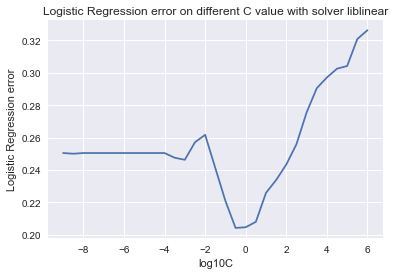

In [25]:
C_list = []
for i in range(len(C_grid)):
    C_list.append(np.log10(C_grid[i]));




fig=plt.figure
ax=plt.axes()
ax.plot(C_list,lib_error_c)
plt.xlabel('log10C')
plt.ylabel('Logistic Regression error')
plt.title('Logistic Regression error on different C value with solver liblinear')



In [49]:
yproba1_test = best_model.predict(x_handle_arr)
np.savetxt('yproba1_test.txt', yproba1_test)



In [50]:
yproba1_test
count0 = 0
count1 = 0
for i in range(len(yproba1_test)):
    if yproba1_test[i] == 1:
        count1 = count1+1
    if yproba1_test[i] == 0:
        count0 = count0+1
        
print(count0)
print(count1)
print(yproba1_test)

301
299
[0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0
 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1
 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1
 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1
 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0
 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0
 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 1
 0 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0
 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0
 1 1 1 1 0 0 0 1 

In [ ]:
print(lib_error_c)

In [ ]:
# sag

In [16]:
C_grid = np.logspace(-9, 6, 31)

sag_error_c=[]

for C in C_grid:
    LR_model=sklearn.linear_model.LogisticRegression(C=C,solver='sag')
    LR_model.fit(x_arr,y_train.values.ravel())
    score = cross_val_score(LR_model,x_arr, y_train.values.ravel()).mean()

    sag_error_c.append(1-score)
    print("aaa")

aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Us

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Us

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Us

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Us

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Us

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Us

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Us

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Us

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Us

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Us

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Us

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Text(0.5, 1.0, 'Logistic Regression error on different C value with solver sag')

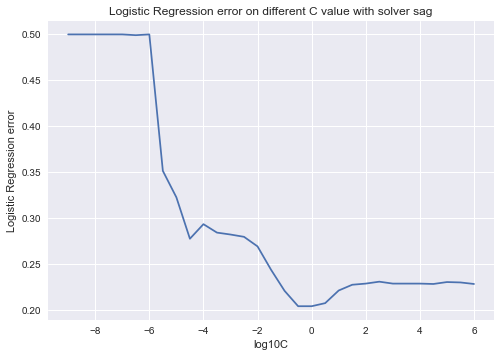

In [17]:
C_list = []
for i in range(len(C_grid)):
    C_list.append(np.log10(C_grid[i]))


fig=plt.figure
ax=plt.axes()
ax.plot(C_list,sag_error_c)
plt.xlabel('log10C')
plt.ylabel('Logistic Regression error')
plt.title('Logistic Regression error on different C value with solver sag')

In [ ]:
print(sag_error_c)

In [ ]:
# saga

In [18]:
C_grid = np.logspace(-9, 6, 31)

saga_error_c=[]

for C in C_grid:
    LR_model=sklearn.linear_model.LogisticRegression(C=C,solver='saga')
    LR_model.fit(x_arr,y_train.values.ravel())
    score = cross_val_score(LR_model,x_arr, y_train.values.ravel()).mean()

    saga_error_c.append(1-score)


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Us

C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Us

Text(0.5, 1.0, 'Logistic Regression error on different C value with solver saga')

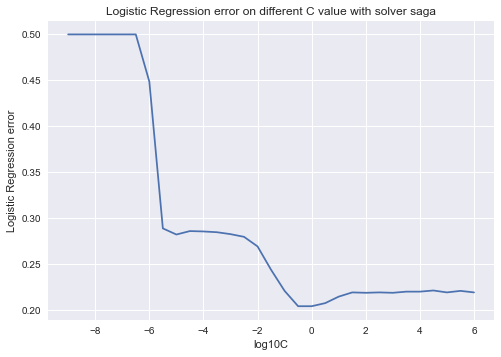

In [20]:
fig=plt.figure
ax=plt.axes()
ax.plot(C_list,saga_error_c)
plt.xlabel('log10C')
plt.ylabel('Logistic Regression error')
plt.title('Logistic Regression error on different C value with solver saga')

In [ ]:
# newton-cg

In [21]:
C_grid = np.logspace(-9, 6, 31)

newton_error_c=[]

for C in C_grid:
    LR_model=sklearn.linear_model.LogisticRegression(C=C,solver='newton-cg')
    LR_model.fit(x_arr,y_train.values.ravel())
    score = cross_val_score(LR_model,x_arr, y_train.values.ravel()).mean()

    newton_error_c.append(1-score)
    print("aaa")
    

aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa


Text(0.5, 1.0, 'Logistic Regression error on different C value with solver newton')

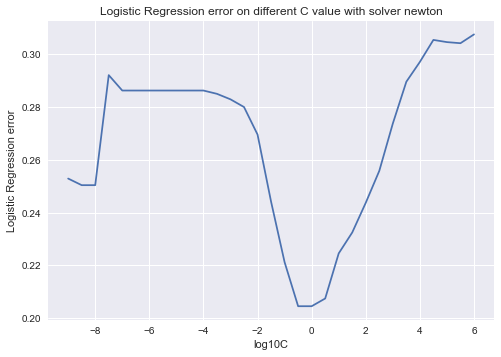

In [23]:
fig=plt.figure
ax=plt.axes()
ax.plot(C_list,newton_error_c)
plt.xlabel('log10C')
plt.ylabel('Logistic Regression error')
plt.title('Logistic Regression error on different C value with solver newton')

In [ ]:
# lbfgs

In [24]:
C_grid = np.logspace(-9, 6, 31)

lbfgs_error_c=[]

for C in C_grid:
    LR_model=sklearn.linear_model.LogisticRegression(C=C,solver='lbfgs')
    LR_model.fit(x_arr,y_train.values.ravel())
    score = cross_val_score(LR_model,x_arr, y_train.values.ravel()).mean()

    lbfgs_error_c.append(1-score)
    print("aaa")

aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

aaa


C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Logistic Regression error on different C value with solver lbfgs')

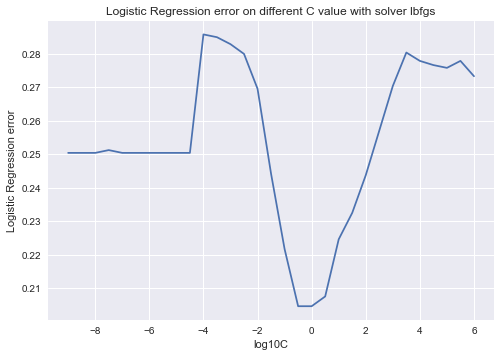

In [26]:
fig=plt.figure
ax=plt.axes()
ax.plot(C_list,lbfgs_error_c)
plt.xlabel('log10C')
plt.ylabel('Logistic Regression error')
plt.title('Logistic Regression error on different C value with solver lbfgs')

In [ ]:
# l1_ratio

In [27]:
C_grid = np.logspace(-9, 6, 31)


lr_error_ratio=[]
num_list = []

for i in range(0, 11):
    num = i/10
    num_list.append(num)
    LR_model=sklearn.linear_model.LogisticRegression(C=1,solver='liblinear', l1_ratio=num)

    LR_model.fit(x_arr,y_train.values.ravel())
    score = cross_val_score(LR_model,x_arr, y_train.values.ravel()).mean()
    lr_error_ratio.append(1-score)



C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used

C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used

Text(0.5, 1.0, 'Logistic Regression error on different l1_ratio value with solver liblinear')

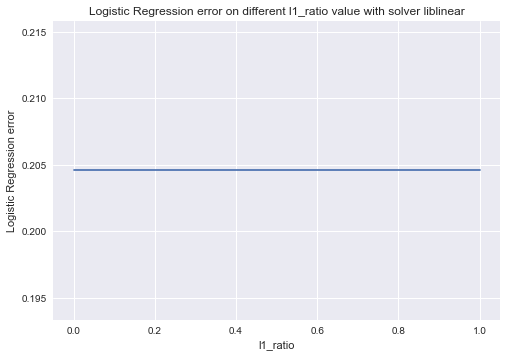

In [29]:
fig=plt.figure
ax=plt.axes()
ax.plot(num_list,lr_error_ratio)
plt.xlabel('l1_ratio')
plt.ylabel('Logistic Regression error')
plt.title('Logistic Regression error on different l1_ratio value with solver liblinear')

In [30]:
# max_iter

In [33]:
lr_error_iter=[]
max_iter_list = []

for i in range(0, 40):

    LR_model=sklearn.linear_model.LogisticRegression(C=3.5,solver='liblinear', max_iter = i)
    max_iter_list.append(i)
    LR_model.fit(x_arr,y_train.values.ravel())
    score = cross_val_score(LR_model,x_arr, y_train.values.ravel()).mean()
    lr_error_iter.append(1-score)



C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml13

Text(0.5, 1.0, 'Logistic Regression error on different max_iter value with solver liblinear')

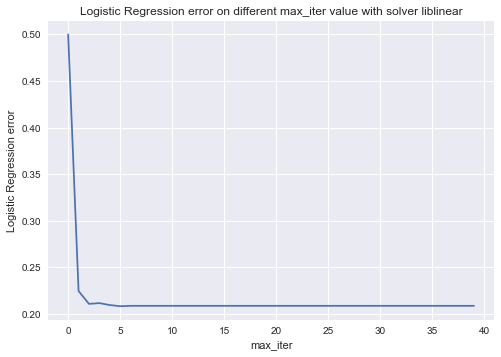

In [34]:
fig=plt.figure
ax=plt.axes()
ax.plot(max_iter_list,lr_error_iter)
plt.xlabel('max_iter')
plt.ylabel('Logistic Regression error')
plt.title('Logistic Regression error on different max_iter value with solver liblinear')

In [107]:
# Neural Network

In [ ]:
# random state

In [20]:
# TODO edit this block to run from 16 different random_states
# Save each run's trained classifier object in a list

import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns



%matplotlib inline

list_mlp_random = []


    
for i in range(1, 20):
    mlp_lbfgs = sklearn.neural_network.MLPClassifier(
        activation='relu',
        random_state=i,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_arr, y_train.values.ravel())
    print("aaa")
    with warnings.catch_warnings(record=True) as warn_list:
        score = cross_val_score(mlp_lbfgs,x_arr, y_train.values.ravel(), cv=3).mean()
        list_mlp_random.append(1-score)




aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa


Text(0.5, 1.0, 'Neural Network error on different random_state value with activation relu')

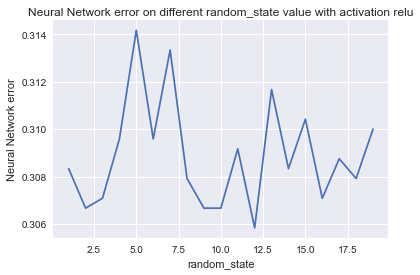

In [21]:
ramdom_list = []
for i in range(1, 20):
    ramdom_list.append(i)
    
fig=plt.figure
ax=plt.axes()

ax.plot(ramdom_list,list_mlp_random)
plt.xlabel('random_state')
plt.ylabel('Neural Network error')
plt.title('Neural Network error on different random_state value with activation relu')

In [ ]:
# hidden layer

In [36]:
# TODO edit this block to run from 16 different random_states
# Save each run's trained classifier object in a list

import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns



%matplotlib inline

list_mlp_layer = []
    
for i in range(1, 10):
    mlp_lbfgs = sklearn.neural_network.MLPClassifier(
        hidden_layer_sizes=[i],
        activation='relu',
        alpha=1,
        random_state=6,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_arr, y_train.values.ravel())


    print("aaa")
    with warnings.catch_warnings(record=True) as warn_list:
        score = cross_val_score(mlp_lbfgs,x_arr, y_train.values.ravel(), cv=3).mean()
        list_mlp_layer.append(1-score)


aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa


Text(0.5, 1.0, 'Neural Network error on different hidden_layer value')

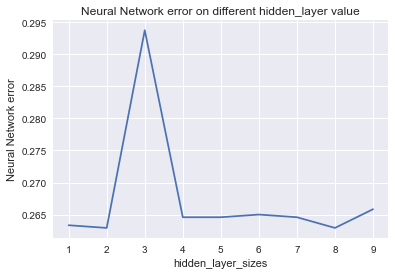

In [37]:
layer_list = []
for i in range(1, 10):
    layer_list.append(i)
    
fig=plt.figure
ax=plt.axes()

ax.plot(layer_list,list_mlp_layer)
plt.xlabel('hidden_layer_sizes')
plt.ylabel('Neural Network error')
plt.title('Neural Network error on different hidden_layer value')


In [285]:
list_mlp_layer.sort()

print(list_mlp_layer)

[0.7116666666666668, 0.7208333333333333, 0.7329166666666667, 0.735, 0.735, 0.7362500000000001, 0.7362500000000001, 0.7366666666666667, 0.7366666666666667]


In [39]:
from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

In [40]:
list_mlp_hidden_layer = []
score_list_1 = []


for i in range(21, 30):
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[i],
        activation='relu',
        alpha=1,
        random_state=6,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_arr, y_train.values.ravel())

    print("aaa")
    with warnings.catch_warnings(record=True) as warn_list:
        score = cross_val_score(mlp_lbfgs,x_arr, y_train.values.ravel(), cv=3).mean()
        list_mlp_hidden_layer.append(1-score)



aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa


Text(0.5, 1.0, 'Neural Network error on different hidden_layer value')

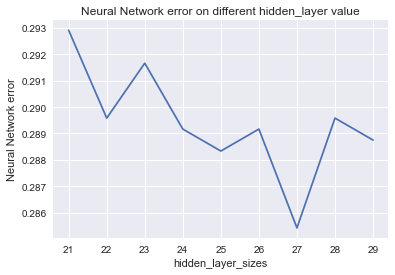

In [41]:
layer_list = []
for i in range(21, 30):
    layer_list.append(i)
    
fig=plt.figure
ax=plt.axes()

ax.plot(layer_list,list_mlp_hidden_layer)
plt.xlabel('hidden_layer_sizes')
plt.ylabel('Neural Network error')
plt.title('Neural Network error on different hidden_layer value')

In [42]:
print(list_mlp_hidden_layer)

[0.2929166666666667, 0.2895833333333333, 0.29166666666666663, 0.2891666666666667, 0.28833333333333344, 0.2891666666666667, 0.28541666666666676, 0.2895833333333333, 0.28874999999999995]


In [173]:
# SVM Classifer

In [9]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
score = 0
error = 0

clf = make_pipeline(StandardScaler(), SVC(C = 1.0))
clf.fit(x_arr, y_train.values.ravel())
score = cross_val_score(clf,x_arr, y_train.values.ravel(), cv=3).mean()
error = 1-score
print("aaa")


aaa


In [11]:
print(error)

0.2841666666666667


In [12]:
scores_c = []

for i in range(1, 10):
    clf = make_pipeline(StandardScaler(), SVC(C = i))
    clf.fit(x_arr, y_train.values.ravel())
    score = cross_val_score(clf,x_arr, y_train.values.ravel(), cv=3).mean()
    scores_c.append(1-score)
    print("aaa")
    

aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa


In [13]:
print(scores_c)

[0.2841666666666667, 0.2600000000000001, 0.2600000000000001, 0.26208333333333333, 0.2666666666666667, 0.26708333333333334, 0.26583333333333325, 0.26541666666666675, 0.2633333333333333]


Text(0.5, 1.0, 'SVM error on different c value')

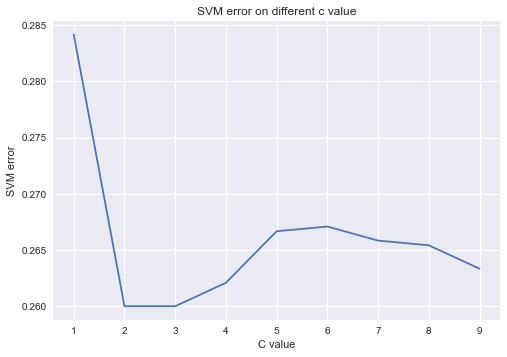

In [14]:
svm_c_list = []
for i in range(1, 10):
    svm_c_list.append(i)
    
fig=plt.figure
ax=plt.axes()

ax.plot(svm_c_list,scores_c)
plt.xlabel('C value')
plt.ylabel('SVM error')
plt.title('SVM error on different c value')

In [15]:
clf = make_pipeline(StandardScaler(), SVC(C = 0.5))
clf.fit(x_arr, y_train.values.ravel())
score1 = cross_val_score(clf,x_arr, y_train.values.ravel(), cv=3).mean()
error1 = 1-score1


In [16]:
print(error1)

0.42041666666666666


In [17]:
svm_errors_random = []

for i in range(1, 10):
    clf = make_pipeline(StandardScaler(), SVC(C = 2, random_state=i))
    clf.fit(x_arr, y_train.values.ravel())
    score = cross_val_score(clf,x_arr, y_train.values.ravel(), cv=3).mean()
    svm_errors_random.append(1-score)
    print("aaa")

aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa
aaa


In [19]:
print(svm_errors_random)

[0.2600000000000001, 0.2600000000000001, 0.2600000000000001, 0.2600000000000001, 0.2600000000000001, 0.2600000000000001, 0.2600000000000001, 0.2600000000000001, 0.2600000000000001]


Text(0.5, 1.0, 'SVM error on different random state with C = 2')

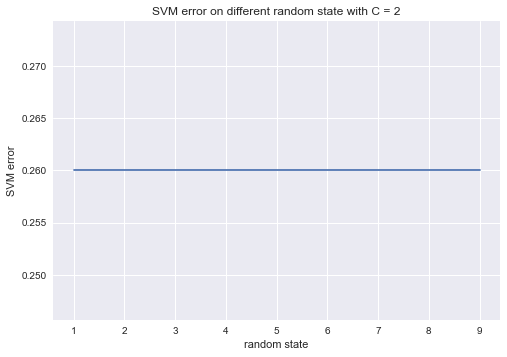

In [18]:
svm_random_list = []
for i in range(1, 10):
    svm_random_list.append(i)
    
fig=plt.figure
ax=plt.axes()

ax.plot(svm_random_list,svm_errors_random)
plt.xlabel('random state')
plt.ylabel('SVM error')
plt.title('SVM error on different random state with C = 2')

In [30]:
clf = make_pipeline(StandardScaler(), SVC(C = 2, gamma="scale"))
clf.fit(x_arr, y_train.values.ravel())
svm_scale_error = 1-cross_val_score(clf,x_arr, y_train.values.ravel(), cv=3).mean()

In [31]:
print(svm_scale_error)

0.2600000000000001


In [32]:
clf = make_pipeline(StandardScaler(), SVC(C = 2, gamma="auto"))
clf.fit(x_arr, y_train.values.ravel())
svm_auto_error = 1-cross_val_score(clf,x_arr, y_train.values.ravel(), cv=3).mean()

In [33]:
print(svm_auto_error)

0.2583333333333333


In [24]:
error_float_list = []
for i in range(10):
    clf = make_pipeline(StandardScaler(), SVC(C = 1, gamma=0.5+i))
    clf.fit(x_arr, y_train.values.ravel())
    score_float = cross_val_score(
        clf,x_arr, y_train.values.ravel(), cv=3).mean()
    error_float_list.append(1-score_float)

In [25]:
print(error_float_list)

[0.49583333333333324, 0.4979166666666667, 0.49916666666666665, 0.49916666666666665, 0.49916666666666665, 0.49916666666666665, 0.49916666666666665, 0.4995833333333334, 0.4995833333333334, 0.4995833333333334]


Text(0.5, 1.0, 'SVM error on different gamma with C = 2')

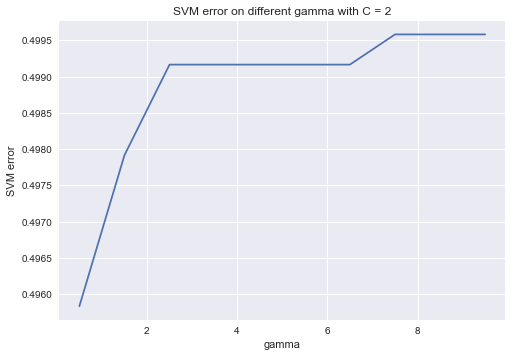

In [35]:
svm_gamma_list = []
for i in range(0, 10):
    svm_gamma_list.append(i+0.5)
    
fig=plt.figure
ax=plt.axes()

ax.plot(svm_gamma_list,error_float_list)
plt.xlabel('gamma')
plt.ylabel('SVM error')
plt.title('SVM error on different gamma with C = 2')

In [211]:
print(score_iter_list)

[0.5316666666666667, 0.5308333333333334, 0.5291666666666667, 0.5316666666666667, 0.5279166666666667, 0.5295833333333334, 0.5295833333333334, 0.5325000000000001, 0.5316666666666667, 0.5304166666666666]


In [45]:
error_iter_list = []
nums = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for i in range(len(nums)):
    clf = make_pipeline(StandardScaler(), SVC(C = 2, gamma='auto',max_iter = i))
    clf.fit(x_arr, y_train.values.ravel())
    error_iter = cross_val_score(clf,x_arr, y_train.values.ravel(), cv=3).mean()
    error_iter_list.append(1-error_iter)

C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=0).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=0).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=0).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=0).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\si

C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=9).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=9).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=9).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=9).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [46]:
print(error_iter_list)


[0.5, 0.4883333333333334, 0.4870833333333333, 0.48458333333333337, 0.4854166666666666, 0.48249999999999993, 0.48416666666666675, 0.48083333333333333, 0.48291666666666666, 0.48375]


Text(0.5, 1.0, 'SVM error on different max_iter with gamma=auto and C = 2')

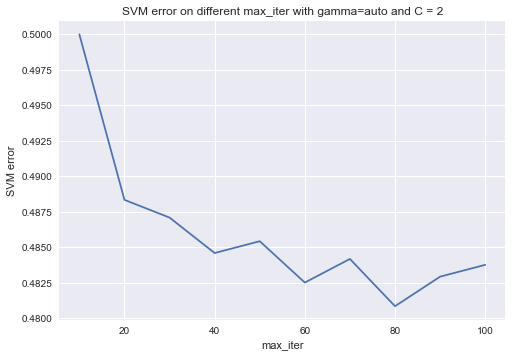

In [47]:
svm_iter_list = []
for i in range(0, 10):
    svm_iter_list.append(i)
    
fig=plt.figure
ax=plt.axes()

ax.plot(nums,error_iter_list)
plt.xlabel('max_iter')
plt.ylabel('SVM error')
plt.title('SVM error on different max_iter with gamma=auto and C = 2')

In [48]:
error_iter_list1 = []
nums = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for i in range(len(nums)):
    clf = make_pipeline(StandardScaler(), SVC(C = 2, gamma='auto',max_iter = i+100))
    clf.fit(x_arr, y_train.values.ravel())
    error_iter = cross_val_score(clf,x_arr, y_train.values.ravel(), cv=3).mean()
    error_iter_list1.append(1-error_iter)

C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp2

C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=108).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=109).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=109).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=109).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp2

Text(0.5, 1.0, 'SVM error on different max_iter with gamma=auto and C = 2')

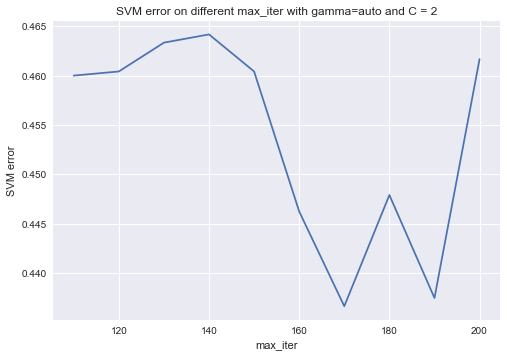

In [49]:
svm_iter_list1 = []
for i in range(0, 10):
    svm_iter_list1.append(nums[i]+100)
    
fig=plt.figure
ax=plt.axes()

ax.plot(svm_iter_list1,error_iter_list1)
plt.xlabel('max_iter')
plt.ylabel('SVM error')
plt.title('SVM error on different max_iter with gamma=auto and C = 2')

In [50]:
error_iter_list2 = []
nums = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for i in range(len(nums)):
    clf = make_pipeline(StandardScaler(), SVC(C = 2, gamma='auto',max_iter = i+500))
    clf.fit(x_arr, y_train.values.ravel())
    error_iter = cross_val_score(clf,x_arr, y_train.values.ravel(), cv=3).mean()
    error_iter_list2.append(1-error_iter)

C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp2

C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=508).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=509).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=509).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=509).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp2

Text(0.5, 1.0, 'SVM error on different max_iter with gamma=auto and C = 2')

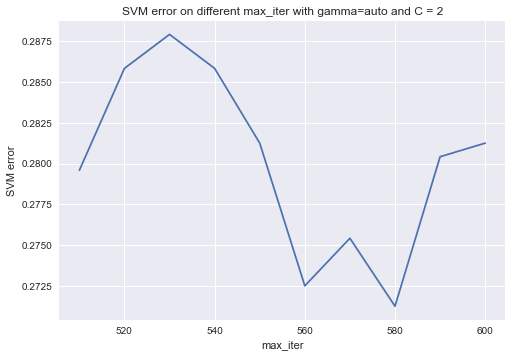

In [51]:
svm_iter_list2 = []
for i in range(0, 10):
    svm_iter_list2.append(nums[i]+500)
    
fig=plt.figure
ax=plt.axes()

ax.plot(svm_iter_list2,error_iter_list2)
plt.xlabel('max_iter')
plt.ylabel('SVM error')
plt.title('SVM error on different max_iter with gamma=auto and C = 2')

In [208]:
clf = make_pipeline(StandardScaler(), SVC(C = 1))
clf.fit(x_arr, y_train.values.ravel())
score = cross_val_score(clf,x_arr, y_train.values.ravel(), cv=3).mean()


In [209]:
print(score)

0.6941666666666667


In [224]:
score_tol_list = []
for i in range(1):
    clf = make_pipeline(StandardScaler(), SVC(C = 1, tol = 1e-3))
    clf.fit(x_arr, y_train.values.ravel())
    score_tol = cross_val_score(clf,x_arr, y_train.values.ravel(), cv=3).mean()
    score_tol_list.append(score_tol)

In [225]:
print(score_tol_list)

[0.6941666666666667]


In [226]:
clf = make_pipeline(StandardScaler(), SVC(C = 1, tol = 1e-4))
clf.fit(x_arr, y_train.values.ravel())
score_tol = cross_val_score(clf,x_arr, y_train.values.ravel(), cv=3).mean()

In [227]:
print(score_tol)

0.6937500000000001


In [229]:
clf = make_pipeline(StandardScaler(), SVC(C = 1, max_iter = 600, gamma = "scale"))
clf.fit(x_arr, y_train.values.ravel())
score_tol = cross_val_score(clf,x_arr, y_train.values.ravel(), cv=3).mean()

C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=600).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=600).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=600).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\12866\miniconda3\envs\ml135_env_sp21\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=600).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [230]:
print(score_tol)

0.6862499999999999
